In [1]:
import pandas as pd
import numpy as np
import umap
import umap.plot


In [2]:
final_clean_df = pd.read_csv('final_clean_df.csv')
final_clean_df.head()

,Unnamed: 0,cells,orig.ident,FAM138A,OR4F5,OR4F29,OR4F16,FAM87B,LINC00115,FAM41C,...,LSS,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MAFIP,FAM231C
0,0,AAACCTGAGCATCATC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,AAACCTGAGCTAACTC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,AAACCTGAGCTAGTGG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,AAACCTGCACATTAGC,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,AAACCTGCACTGTTAG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
final_clean_df_renamed = final_clean_df.drop(columns = ["cells", "Unnamed: 0"])
final_clean_df_renamed

,orig.ident,FAM138A,OR4F5,OR4F29,OR4F16,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,...,LSS,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MAFIP,FAM231C
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11993,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
11995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
final_clean_df_drop = final_clean_df_renamed.drop(columns = ["orig.ident"])
final_clean_df_drop

,FAM138A,OR4F5,OR4F29,OR4F16,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,...,LSS,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MAFIP,FAM231C
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11993,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
11995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Fitting data to .UMAP (Uniform Manifold Approximation and Projection) algorithm for dimensional reduction

* UMAP (Uniform Manifold Approximation and Projection) algorithm, which is a popular technique for dimensionality reduction. UMAP is used to visualize high-dimensional data in a lower-dimensional space, typically 2D or 3D, while preserving the structure of the data as much as possible

In [9]:
mapper = umap.UMAP().fit(final_clean_df_drop)

Text(0.5, 1.0, 'UMAP Projection of bot Metastatic and Non-Metastatic Data')

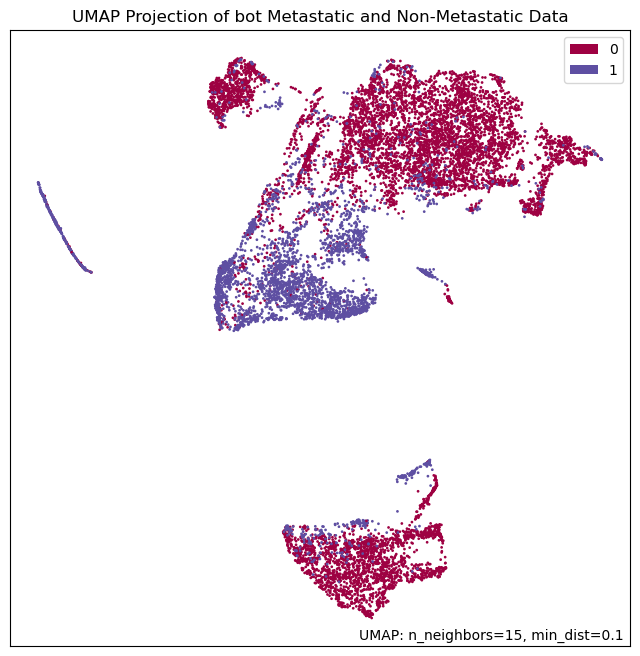

In [431]:
# Ensure the column name is correct
labels = final_clean_df_renamed['orig.ident']

umap.plot.points(mapper, labels=labels)
plt.title("UMAP Projection of bot Metastatic and Non-Metastatic Data")

### Separated dataset into metastatic and non-metastatic datasets

In [13]:
# Filtering metastatic datasets

metastatic_df = final_clean_df_renamed[final_clean_df_renamed["orig.ident"]==1]
metastatic_df

,orig.ident,FAM138A,OR4F5,OR4F29,OR4F16,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,...,LSS,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MAFIP,FAM231C
8482,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8483,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8484,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8485,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8486,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11993,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
11995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
metastatic_df.to_csv("metastatic_df.csv", header = True)

In [16]:
metastatic_df_dropped = metastatic_df.drop(columns="orig.ident")
metastatic_df_dropped

,FAM138A,OR4F5,OR4F29,OR4F16,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,...,LSS,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MAFIP,FAM231C
8482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11993,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
11995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Filtering non-metastatic datasets

non_metastatic_df = final_clean_df_renamed[final_clean_df_renamed["orig.ident"]==0]
non_metastatic_df

,orig.ident,FAM138A,OR4F5,OR4F29,OR4F16,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,...,LSS,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MAFIP,FAM231C
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
11962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
non_metastatic_df.to_csv("non_metastatic_df.csv", header = True)

In [19]:
non_metastatic_df_dropped = non_metastatic_df.drop(columns="orig.ident")
non_metastatic_df_dropped

,FAM138A,OR4F5,OR4F29,OR4F16,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,...,LSS,MCM3AP,YBEY,C21orf58,PCNT,DIP2A,S100B,PRMT2,MAFIP,FAM231C
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
11962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/opt/anaconda3/lib/python3.12/site-packages/umap/plot.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


Text(0.5, 1.0, 'UMAP Projection of Metastatic Data')

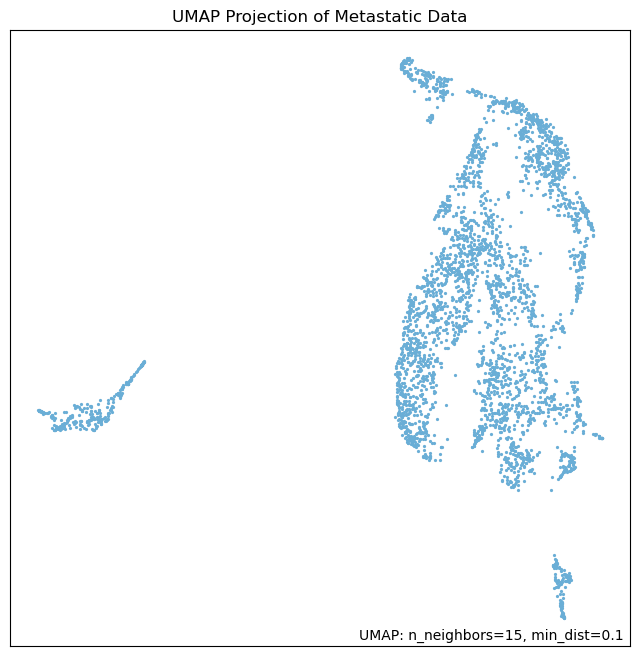

In [264]:
mapper_metastatic = umap.UMAP().fit(metastatic_df_dropped)
umap.plot.points(mapper_metastatic)
plt.title("UMAP Projection of Metastatic Data")

/opt/anaconda3/lib/python3.12/site-packages/umap/plot.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


Text(0.5, 1.0, 'UMAP Projection of Non-Metastatic Data')

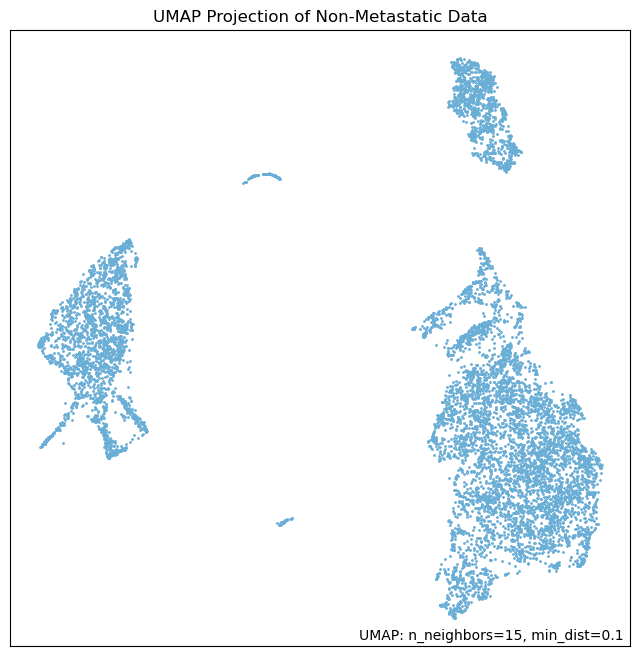

In [265]:
mapper_non_metastatic = umap.UMAP().fit(non_metastatic_df_dropped)
umap.plot.points(mapper_non_metastatic)
plt.title("UMAP Projection of Non-Metastatic Data")

### Importing Anndata and scanpy for furhter analysis

In [437]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
import scanpy as sc
from matplotlib.pyplot import rc_context 
print(ad.__version__)

0.11.3


### Creating an AnnData object to manage single-cell data

In [31]:
adata_meta = ad.AnnData(metastatic_df_dropped)
adata_meta

/opt/anaconda3/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 3475 × 21452

In [269]:
adata_non_meta = ad.AnnData(non_metastatic_df_dropped)
adata_non_meta

/opt/anaconda3/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 8523 × 21452

In [35]:
print(adata_meta.obs_names[:10])

Index(['8482', '8483', '8484', '8485', '8486', '8487', '8488', '8489', '8490',
       '8491'],
      dtype='object')


In [37]:
print(adata_meta.var_names[:10])

Index(['FAM138A', 'OR4F5', 'OR4F29', 'OR4F16', 'FAM87B', 'LINC00115', 'FAM41C',
       'SAMD11', 'NOC2L', 'KLHL17'],
      dtype='object')


### Check if EPCAM expressing cells are in the datasets (Metastatic and non-metastatic)

In [448]:
if "EPCAM" in adata_meta.var_names:
    # Get the index of the EPCAM gene
    epcam_idx = adata_meta.var_names.get_loc("EPCAM")
    
    # Select cells expressing EPCAM (expression > 0)
    epcam_expressing_cells = adata_meta[adata_meta[:, epcam_idx].X > 0]
    
    print(f"Number of EPCAM expressing cells: {epcam_expressing_cells.n_obs}")
else:
    print("EPCAM is not found in the dataset.")

Number of EPCAM expressing cells: 1


In [444]:
if "EPCAM" in adata_non_meta.var_names:
    # Get the index of the EPCAM gene
    epcam_idx = adata_non_meta.var_names.get_loc("EPCAM")
    
    # Select cells expressing EPCAM (expression > 0)
    epcam_expressing_cells = adata_non_meta[adata_non_meta[:, epcam_idx].X > 0]
    
    print(f"Number of EPCAM expressing cells: {epcam_expressing_cells.n_obs}")
else:
    print("EPCAM is not found in the dataset.")

Number of EPCAM expressing cells: 3


In [43]:
import scanpy as sc
from matplotlib.pyplot import rc_context # rc_context is a tool that allows you to temporarily 
                                        #change the settings for your plots. It's like changing the 
                                        #settings on your camera for one photo and then going back to the default 
                                        #settings afterward. This is useful when you want to customize the appearance 
                                        # of a specific plot without affecting other plots.

In [450]:
# Clustering similar genes and running UMAP on adata_meta and adata_non_meta data.

sc.pp.neighbors(adata_meta)
sc.tl.umap(adata_meta)


sc.pp.neighbors(adata_non_meta)
sc.tl.umap(adata_non_meta)

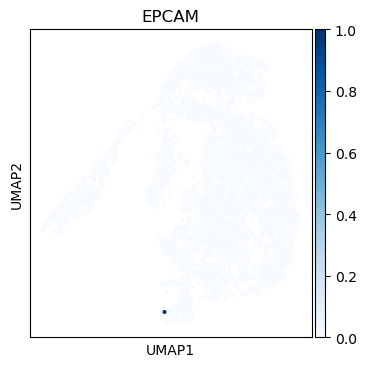

In [99]:
# rc_context is used for the figure size, in this case 4x4
with rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(adata_meta,  color="EPCAM", color_map="Blues")

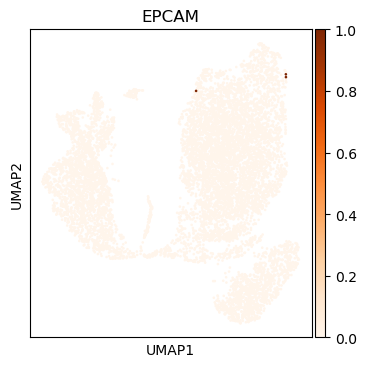

In [454]:
# rc_context is used for the figure size, in this case 4x4
with rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(adata_non_meta,  color="EPCAM", color_map="Oranges")

In [218]:
if "EPCAM" in adata_meta.var_names:
    # Get the index of the EPCAM gene
    epcam_idx = adata_meta.var_names.get_loc("EPCAM")
    # Select cells expressing EPCAM (expression > 0)
    epcam_expressing_cells = adata_meta[adata_meta[:, epcam_idx].X > 0]
    print(f"Number of CTC (EPCAM+) expressing cells: {epcam_expressing_cells.n_obs}")

if "KRT18" in adata_meta.var_names:
    # Get the index of the KRT18 gene
    krt18_idx = adata_meta.var_names.get_loc("KRT18")
    # Select cells expressing PTPRC (expression > 0)
    krt18_expressing_cells = adata_meta[adata_meta[:, krt18_idx].X > 0]
    print(f"Number of Keratin+ (KRT18) expressing cells: {krt18_expressing_cells.n_obs}")

if "PTPRC" in adata_meta.var_names:
    # Get the index of the PTPRC gene
    ptprc_idx = adata_meta.var_names.get_loc("PTPRC")
    # Select cells expressing PTPRC (expression > 0)
    ptprc_expressing_cells = adata_meta[adata_meta[:, ptprc_idx].X > 0]
    print(f"Number of CD45+ or immune cells (PTPRC+) expressing cells: {ptprc_expressing_cells.n_obs}")

if all(gene in adata_meta.var_names for gene in ["CD3D"]):
    # Get the index of the CD3 genes
    CD3D_idx = adata_meta.var_names.get_loc("CD3D")
    # Select cells expressing CD3s (expression > 0)
    CD3_expressing_cells = adata_meta[(adata_meta[:, CD3D_idx].X > 0)]
    print(f"Number of T-cells (CD3+) expressing cells: {CD3_expressing_cells.n_obs}")

if "CD19" in adata_meta.var_names:
    # Get the index of the CD19 gene
    CD19_idx = adata_meta.var_names.get_loc("CD19")
    CD19_expressing_cells = adata_meta[adata_meta[:, CD19_idx].X > 0]
    print(f"Number of B-cells (CD19+) expressing cells: {CD19_expressing_cells.n_obs}")

if "ITGAM" in adata_meta.var_names:
    # Get the index of the ITGAM gene
    itgam_idx = adata_meta.var_names.get_loc("ITGAM")
    itgam_expressing_cells = adata_meta[adata_meta[:, itgam_idx].X > 0]
    print(f"Number of Monocytes (CD11b+) expressing cells: {itgam_expressing_cells.n_obs}")

if "FCGR3A" in adata_meta.var_names:
    # Get the index of the CD16 gene
    fcgr3a_idx = adata_meta.var_names.get_loc("FCGR3A")
    fcgr3a_expressing_cells = adata_meta[adata_meta[:, fcgr3a_idx].X > 0]
    print(f"Number of myeloid cells (CD16+) expressing cells: {fcgr3a_expressing_cells.n_obs}")

Number of CTC (EPCAM+) expressing cells: 1
Number of Keratin+ (KRT18) expressing cells: 15
Number of CD45+ or immune cells (PTPRC+) expressing cells: 1743
Number of T-cells (CD3+) expressing cells: 1194
Number of B-cells (CD19+) expressing cells: 85
Number of Monocytes (CD11b+) expressing cells: 151
Number of myeloid cells (CD16+) expressing cells: 354


### Creating function to count cells

In [467]:
def count_gene_expressing_cells(adata_meta, gene_name):
    
    if gene_name in adata_meta.var_names:
        # Get the index of the gene
        gene_idx = adata_meta.var_names.get_loc(gene_name)
        # Select cells expressing the gene (expression > 0)
        gene_expressing_cells = adata_meta[adata_meta[:, gene_idx].X > 0]
        print(f"Number of cells expressing {gene_name}: {gene_expressing_cells.n_obs}")
    else:
        print(f"{gene_name} gene not found in the dataset.")
        return 0

# Count EPCAM+ cells
count_gene_expressing_cells(adata_meta, "EPCAM")


Number of cells expressing EPCAM: 1


In [469]:
count_gene_expressing_cells(adata_meta, "KRT18")
count_gene_expressing_cells(adata_meta, "PTPRC")
count_gene_expressing_cells(adata_meta, "CD19")
count_gene_expressing_cells(adata_meta, "ITGAM")
count_gene_expressing_cells(adata_meta, "FCGR3A")
count_gene_expressing_cells(adata_meta, "CD3D")

Number of cells expressing KRT18: 15
Number of cells expressing PTPRC: 1743
Number of cells expressing CD19: 85
Number of cells expressing ITGAM: 151
Number of cells expressing FCGR3A: 354
Number of cells expressing CD3D: 1194


In [471]:
# In non_metastatic data
count_gene_expressing_cells(adata_non_meta, "EPCAM")
count_gene_expressing_cells(adata_non_meta, "KRT18")
count_gene_expressing_cells(adata_non_meta, "PTPRC")
count_gene_expressing_cells(adata_non_meta, "CD19")
count_gene_expressing_cells(adata_non_meta, "ITGAM")
count_gene_expressing_cells(adata_non_meta, "FCGR3A")
count_gene_expressing_cells(adata_non_meta, "CD3D")


Number of cells expressing EPCAM: 3
Number of cells expressing KRT18: 135
Number of cells expressing PTPRC: 7065
Number of cells expressing CD19: 549
Number of cells expressing ITGAM: 887
Number of cells expressing FCGR3A: 878
Number of cells expressing CD3D: 4789


### Labeling clusters with markers

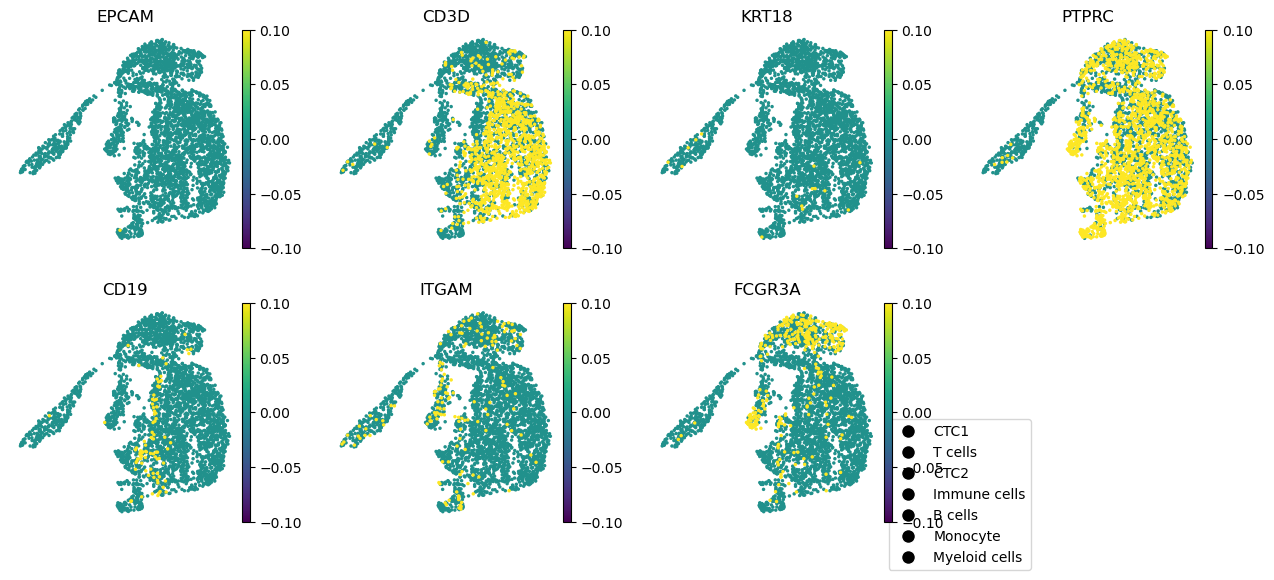

In [262]:
import matplotlib.pyplot as plt

color_vars = {
    "CTC": "EPCAM",
    "T cells": "CD3D",
    "CTC2": "KRT18",
    "Immune cells": "PTPRC",
    "B cells": "CD19",
    "Monocyte": "ITGAM",
    "Myeloid cells": "FCGR3A"
}

# Plot UMAP
with rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(adata_meta, color=list(color_vars.values()), s=25, frameon=False, ncols=4, vmax="p1", show=False)

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label=label) for label in color_vars.keys()]
plt.legend(handles=handles, loc='best', bbox_to_anchor=(1, 0.5))

plt.show()

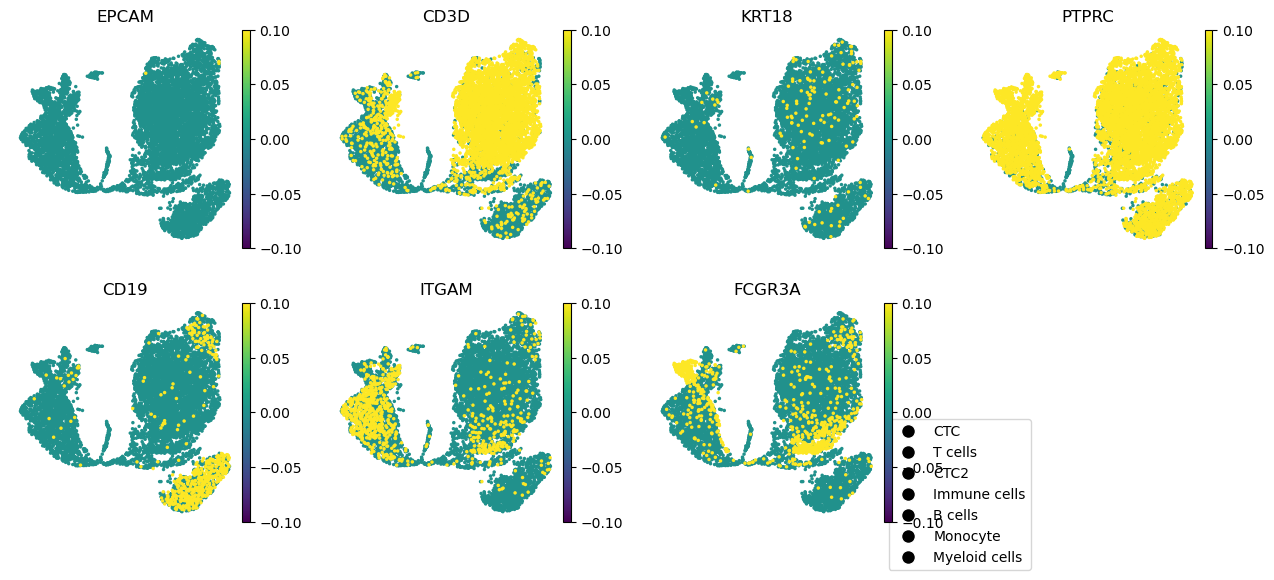

In [458]:
color_vars = {
    "CTC": "EPCAM",
    "T cells": "CD3D",
    "CTC2": "KRT18",
    "Immune cells": "PTPRC",
    "B cells": "CD19",
    "Monocyte": "ITGAM",
    "Myeloid cells": "FCGR3A"
}

# Plot UMAP
with rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(adata_non_meta, color=list(color_vars.values()), s=25, frameon=False, ncols=4, vmax="p1", show=False)

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label=label) for label in color_vars.keys()]
plt.legend(handles=handles, loc='best', bbox_to_anchor=(1, 0.5))

plt.show()

### Use LEIDEN METHOD to find the name of the clsuters

In [242]:
# compute clusters using the leiden method and store the results with the name `clusters`
sc.tl.leiden(
    adata_meta,
    key_added="clusters",
    resolution=0.5,
    n_iterations=2,
    flavor="igraph",
    directed=False,
)

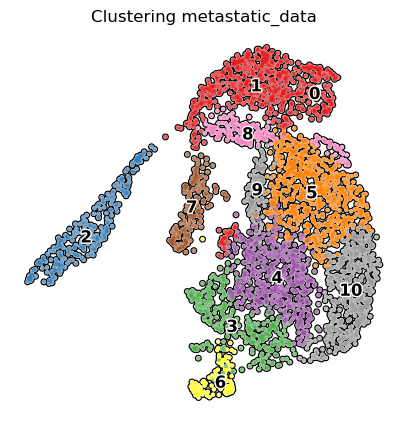

In [425]:
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata_meta,
        color="clusters",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="Clustering metastatic_data",
        palette="Set1",
    )

In [274]:
# compute clusters using the leiden method and store the results with the name `clusters`
sc.tl.leiden(
    adata_non_meta,
    key_added="clusters",
    resolution=0.5,
    n_iterations=2,
    flavor="igraph",
    directed=False,
)

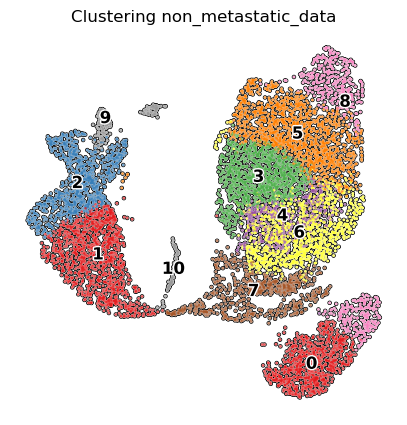

In [434]:
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata_non_meta,
        color="clusters",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="Clustering non_metastatic_data",
        palette="Set1",
    )

In [387]:
marker_genes_dict = {
    "B cell": ["CD19", "CD79A", "MS4A1"],
    "CTC": ["EPCAM", "KRT18"],
    "Dendritic": ["FCER1A"],
    "Monocyte": ["ITGAM"],
    "Myeloid": ["FCGR3A"],
     "NK": ["GNLY", "NKG7"],
    "T-cell": ["CD3D"],
}

categories: 0, 1, 2, etc.
var_group_labels: B cell, CTC, Dendritic, etc.


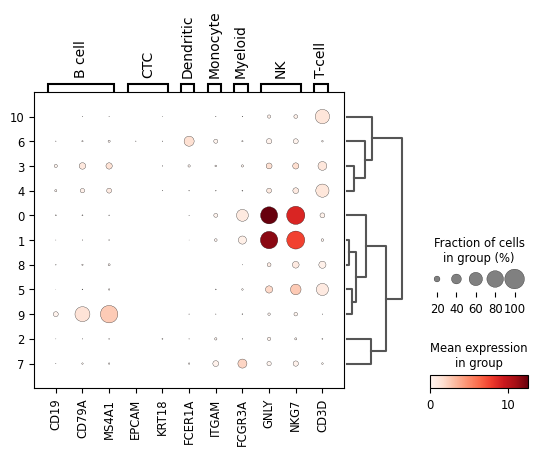

In [389]:
sc.tl.dendrogram
sc.pl.dotplot(adata_meta, marker_genes_dict, "clusters", dendrogram=True)

In [492]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    "0": "NK",
    "1": "NK",
    "2": "Dendritic",
    "3": "T cell",
    "4": "T cell",
    "5": "T cell",
    "6": "CTC and Dendritic",
    "7": "Myeloid",
    "8": "T cell",
    "9": "B cell",
    "10":"T cell",
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata_meta.obs["cell type"] = adata_meta.obs["clusters"].map(cluster2annotation).astype("category")

In [494]:
sc.tl.dendrogram(adata_meta, groupby='cell type')

categories: B cell, CTC and Dendritic, Dendritic, etc.
var_group_labels: B cell, CTC, Dendritic, etc.


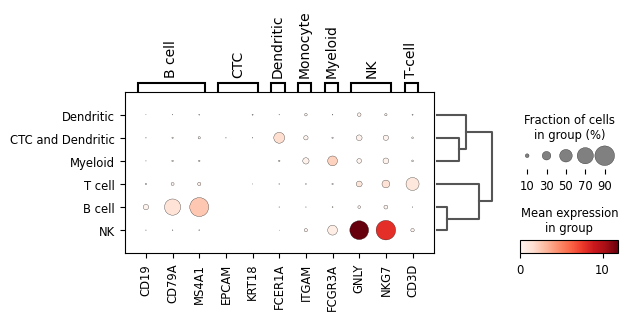

In [495]:
sc.pl.dotplot(adata_meta, marker_genes_dict, "cell type", dendrogram=True)

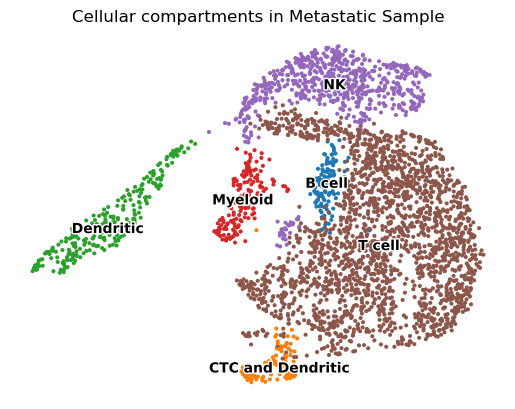

In [524]:
sc.pl.umap(
    adata_meta,
    color="cell type",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=10,
    legend_fontoutline=2,
    title = "Cellular compartments in Metastatic Sample",
)

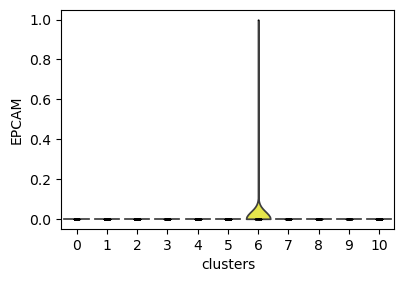

In [500]:
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(adata_meta, ["EPCAM", ], groupby="clusters")

In [502]:
marker_genes_dict_non = {
    "B cell": ["CD19", "CD79A", "MS4A1"],
    "CTC": ["EPCAM", "KRT18"],
    "Dendritic": ["FCER1A"],
    "Monocyte": ["ITGAM"],
    "Myeloid": ["FCGR3A"],
     "NK": ["GNLY", "NKG7"],
    "T-cell": ["CD3D"],
}

categories: 0, 1, 2, etc.
var_group_labels: B cell, CTC, Dendritic, etc.


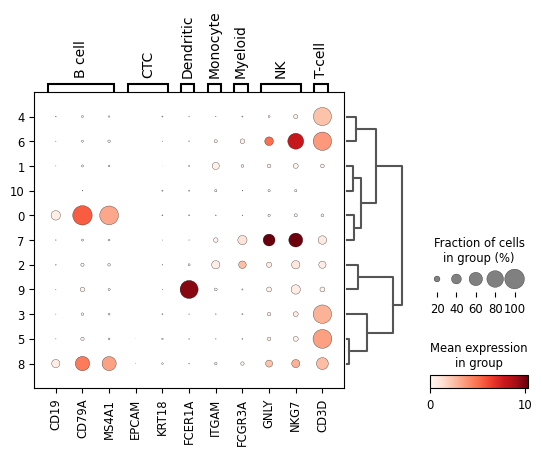

In [504]:
sc.tl.dendrogram(adata_meta, groupby='cell type')
sc.pl.dotplot(adata_non_meta, marker_genes_dict, "clusters", dendrogram=True)

In [506]:
# create a dictionary to map cluster to annotation label
cluster2annotation_non = {
    "0": "B cell",
    "1": "Monocyte",
    "2": "Myeloid",
    "3": "T cell",
    "4": "T cell",
    "5": "T cell",
    "6": "T cell",
    "7": "NK cell",
    "8": "B cell",
    "9": "Dendritic",
    "10":"Monocyte",
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata_non_meta.obs["cell type"] = adata_non_meta.obs["clusters"].map(cluster2annotation_non).astype("category")

In [508]:
sc.tl.dendrogram(adata_non_meta, groupby='cell type')

categories: B cell, Dendritic, Monocyte, etc.
var_group_labels: B cell, CTC, Dendritic, etc.


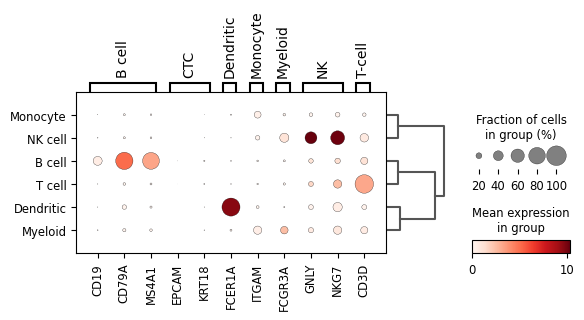

In [510]:
sc.pl.dotplot(adata_non_meta, marker_genes_dict, "cell type", dendrogram=True)

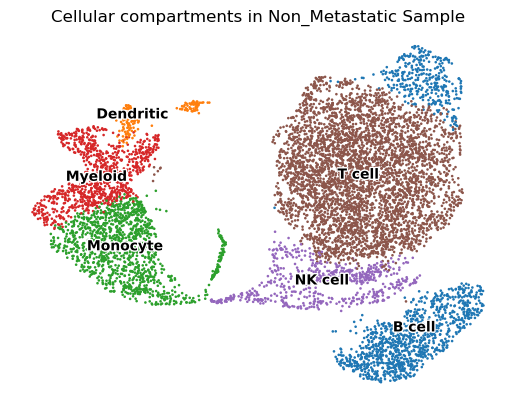

In [526]:
sc.pl.umap(
    adata_non_meta,
    color="cell type",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=10,
    legend_fontoutline=2,
    title = "Cellular compartments in Non_Metastatic Sample",
)

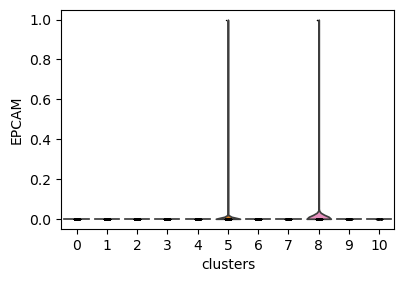

In [514]:
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(adata_non_meta, ["EPCAM", ], groupby="clusters")

### To show differencially expressed genes in different type of cells, heatmap was used.

categories: 0, 1, 2, etc.
var_group_labels: B cell, CTC, Dendritic, etc.


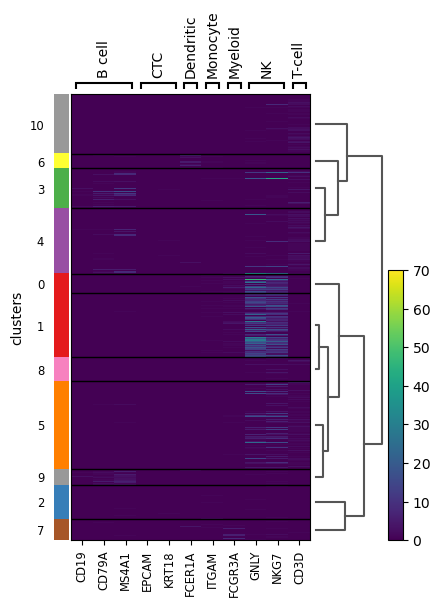

In [516]:
metastatit_heatmap = sc.pl.heatmap(
    adata_meta, marker_genes_dict, groupby="clusters", cmap="viridis", dendrogram=True
)

categories: 0, 1, 2, etc.
var_group_labels: B cell, CTC, Dendritic, etc.


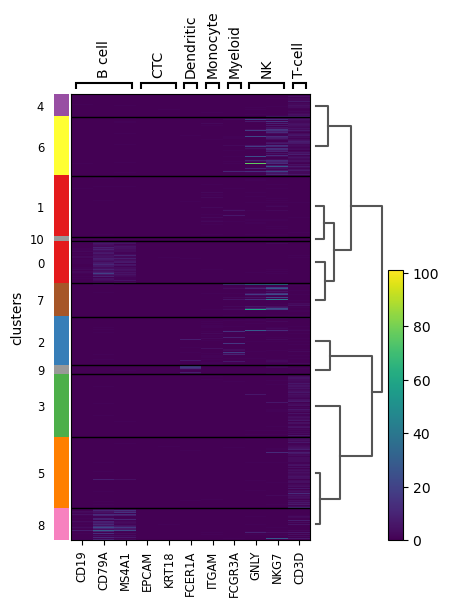

In [518]:
non_metastatit_heatmap = sc.pl.heatmap(
    adata_non_meta, marker_genes_dict, groupby="clusters", cmap="viridis", dendrogram=True
)